# Аналитика средствами Python


У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

query_1.csv — результат первого запроса. 

В нём содержится информация о: 
- model — модели самолета 
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

query_3.csv — результат третьего запроса. 

В нём содержится информация о: 
- city — городах 
- average_flights — среднем количестве рейсов, прибывающих в город city за день в сентябре 2018 года

### Для этих двух наборов данных нужно:
- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- Постройте графики и сделайте выводы по каждому из графиков: 
    - модели самолетов и количество рейсов,
    - топ-10 городов и количество рейсов.



### Проверка гипотезы средствами Python

query_last.csv — результат последнего запроса. 


В нём следующая информация:
- week_number — номер недели;
- ticket_amount — количество проданных билетов за неделю;
- festival_week — есть ли на этой неделе фестиваль;
- festival_name — название фестиваля.

##### Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение alpha задайте самостоятельно.

Поясните:

Как вы формулировали нулевую и альтернативную гипотезы;
Какой критерий использовали для проверки гипотез и почему.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Аналитика средствами Python



In [13]:
# Открываем данные

query_1 = pd.read_csv('query_1.csv')
query_3 = pd.read_csv('query_3.csv')


query_1.info(), query_3.info()  # смотрим инфу о пропусках

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


(None, None)

Данные корректные, пропусков нет, типы данных - корректные

In [14]:
# Выделим топ-10 городов по кол-ву рейсов

top_10_cities_flights = \
query_3.sort_values(by = 'average_flights',
                    ascending= False) \
        .head(10)


top_10_cities_flights

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


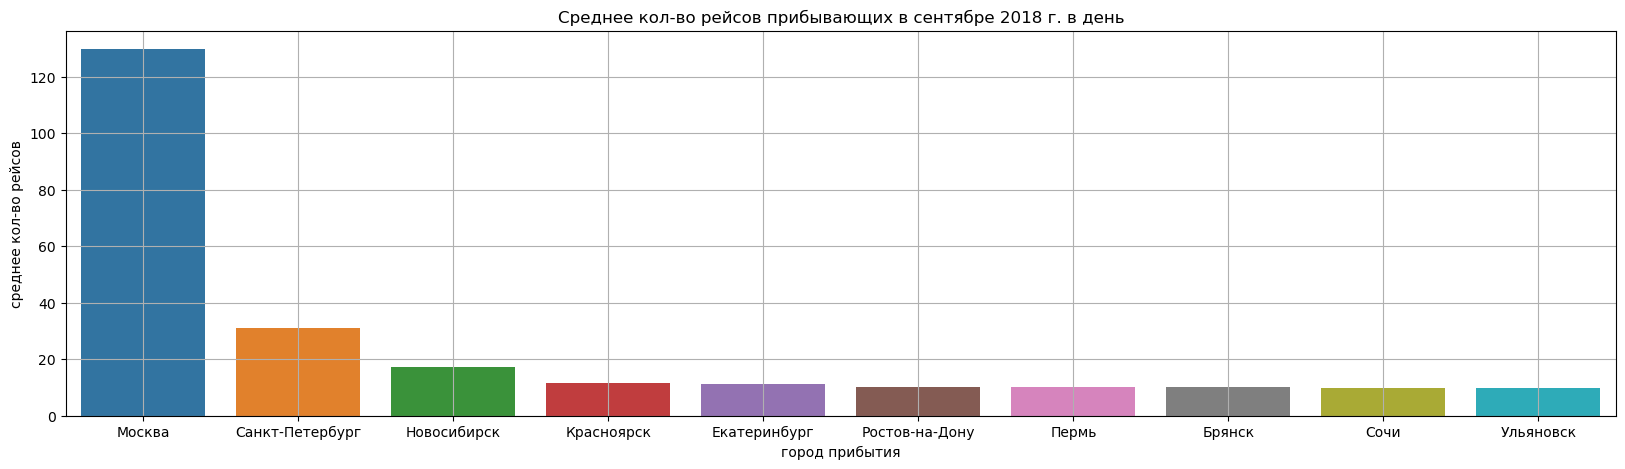

In [15]:
plt.figure(figsize=(20, 5))
sns.barplot(data = top_10_cities_flights,
            x = 'city',
            y = 'average_flights')
plt.ylabel('среднее кол-во рейсов')
plt.xlabel('город прибытия')
plt.title('Среднее кол-во рейсов прибывающих в сентябре 2018 г. в день')
plt.grid()

1) Больше всего рейсов в сентябре 2018 года прибыло в Москву (130 в среднем)
2) В Питер прилетело 31 рейс
3) В Новосибирск 17 рейсов
4) Все остальные города в топ-10 дают схожие результаты (10 в среднем)

Пояснение:

Москва - самый густонаселенный город среди всех (СПБ - на втором месте по населению) --> большее кол-во авиационной инфраструктуры (аэропорты)
У все осталных городов население меньше --> инфраструктура слабее --> рейсов меньше


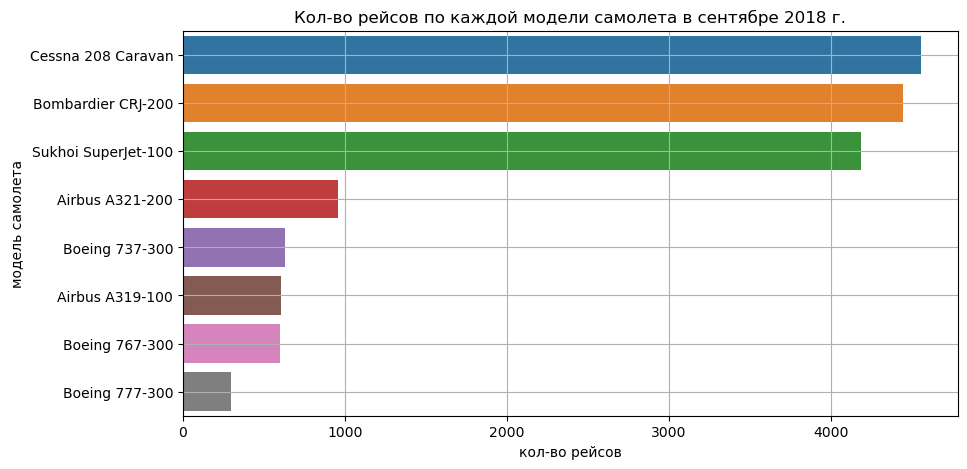

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(data = query_1.sort_values(by = 'flights_amount',
                                       ascending = False),
            x = 'flights_amount',
            y = 'model')

plt.xlabel('кол-во рейсов')
plt.ylabel('модель самолета')
plt.title('Кол-во рейсов по каждой модели самолета в сентябре 2018 г.')
plt.grid()

топ-3 самолета - это малые самолеты (маленькая дальность полета)
Вывод --> чаще всего прилетают самолеты с соседних стран (близлежащих по отношению к городу) либо из российских близлежащих городов/населенных пунктов

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Проверка гипотезы средствами Python

##### Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

In [17]:
data_festival  = pd.read_csv('query_last.csv').rename({'week_number': 'нормер недели',
                                                       'ticket_amount': 'кол-во проданных билетов (в нед.)',
                                                       'festival_week': 'есть ли фестиваль на неделе',
                                                       'festival_name': 'название фестиваля'},
                                                       axis=1)
data_festival

,нормер недели,кол-во проданных билетов (в нед.),есть ли фестиваль на неделе,название фестиваля
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


видим что в колонке "есть ли фестиваль на неделе" - есть пропуски и по сути колонка дублирует номер недели. 
Заменим числа на 1 (есть фестиваль на неделе) и 0 (нет фестиваля на неделе)

In [18]:
data_festival['есть ли фестиваль на неделе'] = data_festival['есть ли фестиваль на неделе'].fillna(0)

def yes_or_no(x):
    if x == 0:
        return x
    else:
        return 1
    
data_festival['есть ли фестиваль на неделе'] = data_festival['есть ли фестиваль на неделе'].map(yes_or_no).astype(int)
data_festival


,нормер недели,кол-во проданных билетов (в нед.),есть ли фестиваль на неделе,название фестиваля
0,30,43568,1,Park Live
1,31,51034,1,Пикник Афиши
2,32,51675,0,NaN
3,33,51378,0,NaN
4,34,51492,0,NaN
5,35,51360,0,NaN
6,36,51386,1,Видфест
7,37,51670,0,NaN
8,38,51518,0,NaN
9,39,51623,0,NaN


Сформулируем нулевую и первую гипотезы:

    H0: Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время
    H1: Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время

In [19]:
# Сначала проверим равенство ( или неравенство ) дисперсий

alpha = 0.05

data_1 = data_festival[data_festival['есть ли фестиваль на неделе'] == 1]['кол-во проданных билетов (в нед.)'] 
data_2 = data_festival[data_festival['есть ли фестиваль на неделе'] == 0]['кол-во проданных билетов (в нед.)'] 


print(np.var(data_1))
print(np.var(data_2))

12998464.888888888
14694.408163265309


Дисперсии сильно различны --> применим критерий Уэлча (equal_var = False)

In [20]:
results = st.ttest_ind(data_1, data_2, equal_var=False)
p_value = results.pvalue

if alpha > p_value:
    print('отвергаем H0')
else:
    print('При выбранном alpha - H0 не отвергаем')

print('p-значение' , p_value)

При выбранном alpha - H0 не отвергаем
p-значение 0.377432493172683


Нулевую гипотезу не удалось отвергнуть --> Средний спрос на билеты во время фестивалей НЕ ОТЛИЧАЕТСЯ от среднего спроса на билеты в обычное время
Есть 37% вероятность что полученный результат случаен 

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Вывод: 

	1) Самый загруженный город по прилетам - Москва
	2) Кол-во рейсов по каждом содели самолета зависит от его размеров ( и как следствие --> его дальности полета )
	3) Средний спрос на билеты во время фестиваля и в обычное время --> НЕ ОТЛИЧАЮТСЯ